##### Load and Setup

In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data-parallel add without any tasking
dp_add = pd.read_csv("basic-add-usm/timings.csv")
# Single-kernel MultiQ Add
sk_add = pd.read_csv("single-kernel-multiQ-add/timings.csv")
splitk_add = pd.read_csv("split-kernel-multiQ-add/timings.csv")
oneq_add = pd.read_csv("gsq-add/timings.csv")

In [34]:
# dp_grouped = dp_add.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# sk_grouped = sk_add.groupby(["VectorSize","Event","WorkGroupSize", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# sk_grouped = sk_grouped[sk_grouped["WorkGroupSize"] == 32]
# oneq_grouped = oneq_add.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# print(oneq_grouped.head(10))
# # print(sk_grouped.head(10))


In [35]:
# pivot_dp = dp_grouped.pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# pivot_sk = sk_grouped.pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')

# kernel_pivot_dp_grouped = dp_grouped[dp_grouped['Event'] == 'Kernel Exec Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# memory_pivot_dp_grouped = dp_grouped[dp_grouped['Event'] == 'Memory Setup Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# total_pivot_dp_grouped = dp_grouped[dp_grouped['Event'] == 'Total Exec Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')

# # Create pivot tables for sk_grouped
# kernel_pivot_sk_grouped = sk_grouped[sk_grouped['Event'] == 'Kernel Exec Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# memory_pivot_sk_grouped = sk_grouped[sk_grouped['Event'] == 'Memory Setup Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# total_pivot_sk_grouped = sk_grouped[sk_grouped['Event'] == 'Total Exec Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')

# # Subtract sk_grouped from dp_grouped for each event type
# kernel_diff =  - kernel_pivot_dp_grouped + kernel_pivot_sk_grouped
# memory_diff =  - memory_pivot_dp_grouped + memory_pivot_sk_grouped
# total_diff =  - total_pivot_dp_grouped + total_pivot_sk_grouped

# # Combine the differences into a single DataFrame
# diff_df = pd.concat([kernel_diff, memory_diff, total_diff], keys=['Kernel Exec Time', 'Memory Setup Time', 'Total Exec Time'], axis=1)

# # Reset index to include VectorSize as a column
# diff_df.reset_index(inplace=True)

# # Write the combined differences DataFrame to a CSV file
# diff_df.to_csv('differences_sk_dp.csv', index=False)

# # Subtract one dataframe from the otherb
# dp_sk = pivot_sk - pivot_dp
# # ke_dp_sq = pivot_oneq - pivot_dp
# ke_dp_sk.to_csv("dp-sk.csv")
# # ke_dp_sq.to_csv("ke-dp-sq.csv")



In [36]:


# kernel_pivot_oneq_grouped = oneq_grouped[oneq_grouped['Event'] == 'Kernel Exec Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# memory_pivot_oneq_grouped = oneq_grouped[oneq_grouped['Event'] == 'Memory Setup Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')
# total_pivot_oneq_grouped = oneq_grouped[oneq_grouped['Event'] == 'Total Exec Time'].pivot_table(index='VectorSize', columns='Device', values='mean', aggfunc='first')


# # Subtract oneq_grouped from dp_grouped for each event type
# kernel_diff =  - kernel_pivot_dp_grouped + kernel_pivot_oneq_grouped
# memory_diff =  - memory_pivot_dp_grouped + memory_pivot_oneq_grouped
# total_diff =  - total_pivot_dp_grouped + total_pivot_oneq_grouped

# # Combine the differences into a single DataFrame
# diff_df = pd.concat([kernel_diff, memory_diff, total_diff], keys=['Kernel Exec Time', 'Memory Setup Time', 'Total Exec Time'], axis=1)

# # Reset index to include VectorSize as a column
# diff_df.reset_index(inplace=True)

# # Write the combined differences DataFrame to a CSV file
# diff_df.to_csv('differences_sq_dp.csv', index=False)


##### Data-parallel add (no tasking)

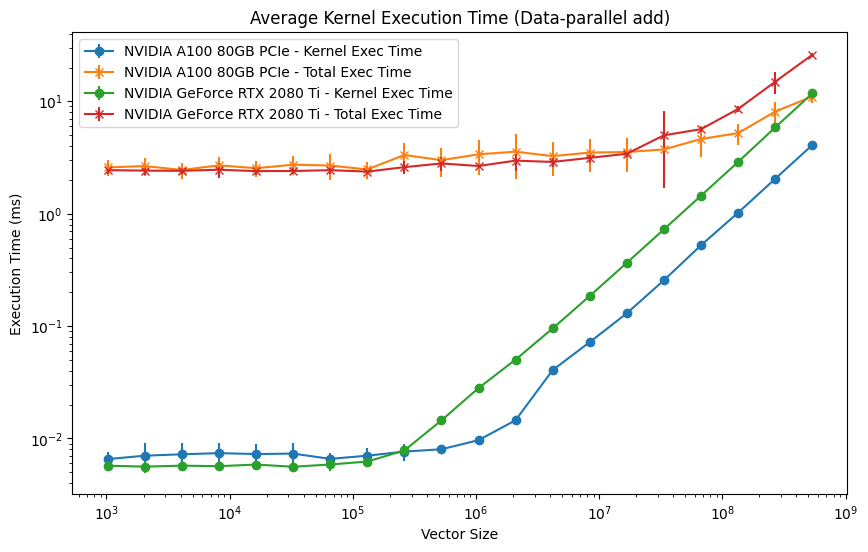

In [37]:
dp_grouped = dp_add.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
#print(dp_grouped.head(10))
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xscale("log")
ax.set_yscale("log")
# Iterate over each device type
for device in dp_grouped['Device'].unique():
    device_data = dp_grouped[dp_grouped['Device'] == device]
    ax.errorbar(device_data[device_data['Event'] == 'Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Kernel Exec Time']['std'], 
                 label=f"{device} - Kernel Exec Time", fmt='-o')
    # Plotting error bars for 'Total Exec Time' event
    ax.errorbar(device_data[device_data['Event'] == 'Total Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Total Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Total Exec Time']['std'], 
                 label=f"{device} - Total Exec Time", fmt='-x')

# Set labels and title
ax.set_xlabel('Vector Size')
ax.set_ylabel('Execution Time (ms)')
ax.set_title('Average Kernel Execution Time (Data-parallel add)')
ax.legend()

# Show plot
plt.show()





##### Single-Kernel MultiQ Add - kernel exec time as a function of work-group size

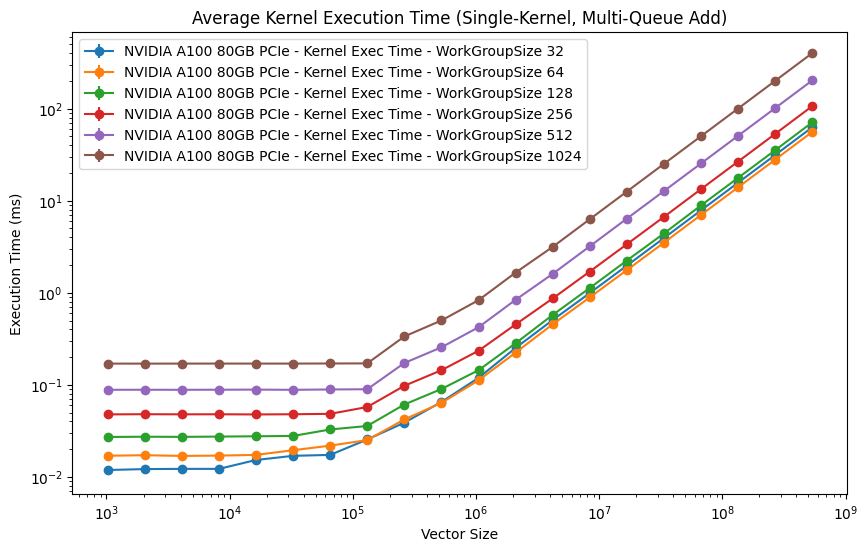

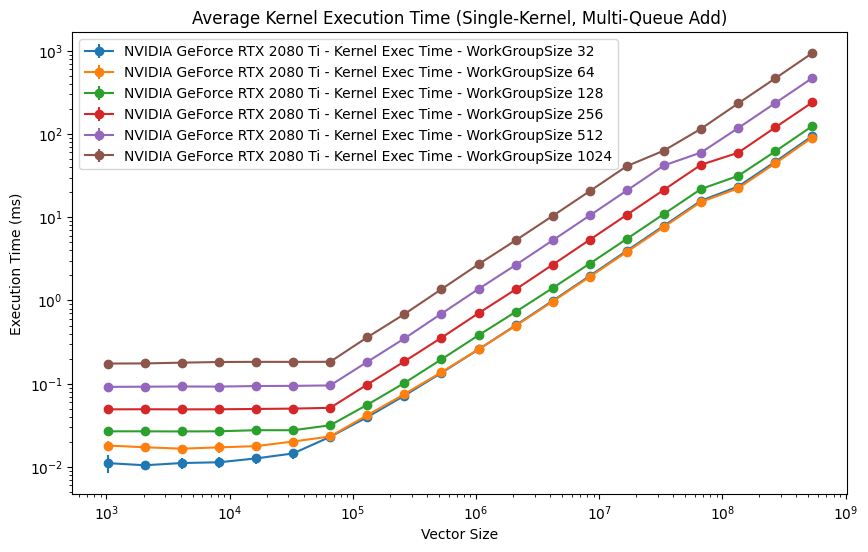

In [38]:
sk_grouped = sk_add.groupby(["VectorSize","Event","WorkGroupSize", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# Plotting

# Iterate over each device type
for device in sk_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xscale("log")
    ax.set_yscale("log")

    for event in ["Kernel Exec Time"]:
        for wg_size in sk_grouped["WorkGroupSize"].unique():
            wg_data = sk_grouped[(sk_grouped["Device"] == device) & 
                                (sk_grouped["Event"] == event) &
                                (sk_grouped["WorkGroupSize"] == wg_size)
                                ]

            if not wg_data.empty:
                ax.errorbar(wg_data["VectorSize"],
                            wg_data["mean"],
                            yerr=wg_data["std"],
                            label=f"{device} - {event} - WorkGroupSize {wg_size}",
                            fmt="-o")
    device_data = sk_grouped[sk_grouped['Device'] == device]

    # Set labels and title
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Average Kernel Execution Time (Single-Kernel, Multi-Queue Add)')    
    ax.legend()

    # Show plot
    plt.show()

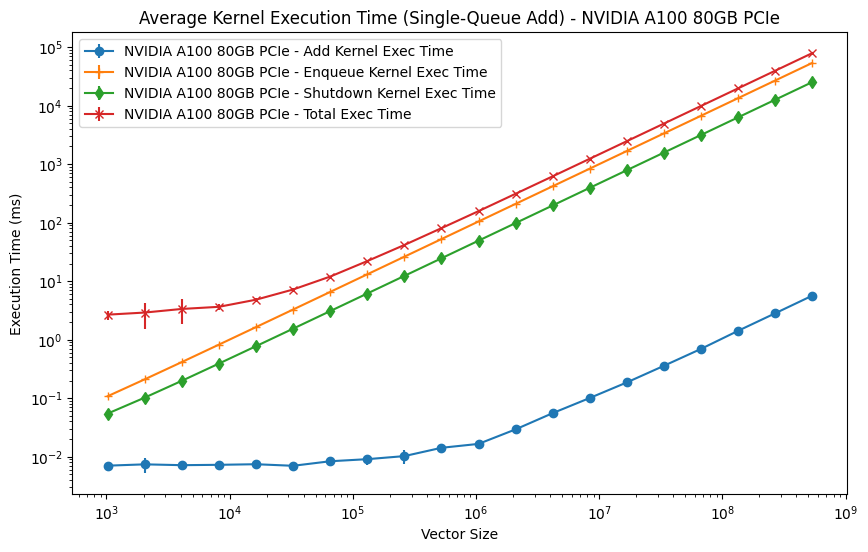

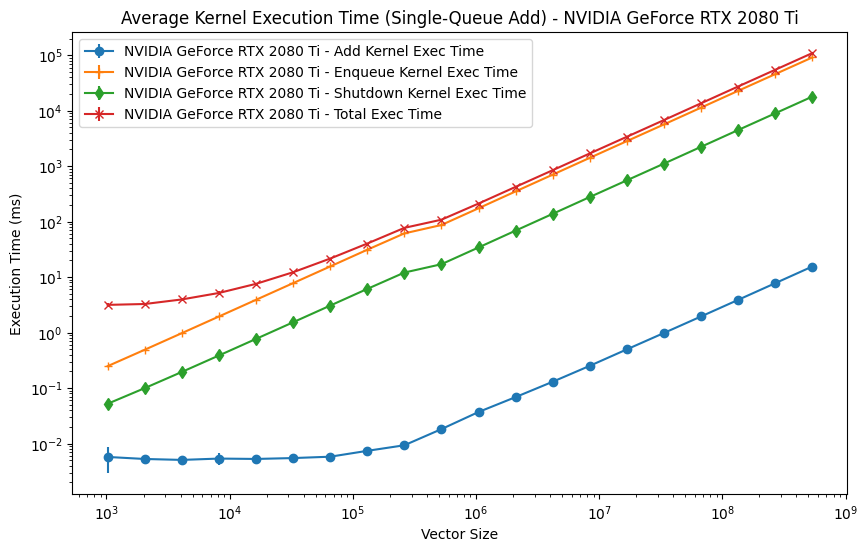

In [39]:
# Single-Queue Add
oneq_grouped = oneq_add.groupby(["VectorSize","Event", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()

# print(oneq_grouped.head(10))
# Plotting
for device in oneq_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xscale("log")
    ax.set_yscale("log")    
    device_data = oneq_grouped[oneq_grouped['Device'] == device]
    ax.errorbar(device_data[device_data['Event'] == 'Add Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Add Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Add Kernel Exec Time']['std'], 
                 label=f"{device} - Add Kernel Exec Time", fmt='-o')

    ax.errorbar(device_data[device_data['Event'] == 'Enqueue Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Enqueue Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Enqueue Kernel Exec Time']['std'], 
                 label=f"{device} - Enqueue Kernel Exec Time", fmt='-+')

    ax.errorbar(device_data[device_data['Event'] == 'Shutdown Kernel Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Shutdown Kernel Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Shutdown Kernel Exec Time']['std'], 
                 label=f"{device} - Shutdown Kernel Exec Time", fmt='-d')
    # Plotting error bars for 'Total Exec Time' event
    ax.errorbar(device_data[device_data['Event'] == 'Total Exec Time']['VectorSize'], 
                 device_data[device_data['Event'] == 'Total Exec Time']['mean'], 
                 yerr=device_data[device_data['Event'] == 'Total Exec Time']['std'], 
                 label=f"{device} - Total Exec Time", fmt='-x')

    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Average Kernel Execution Time (Single-Queue Add) - {device}')
    ax.legend()

    # Show plot
    plt.show()



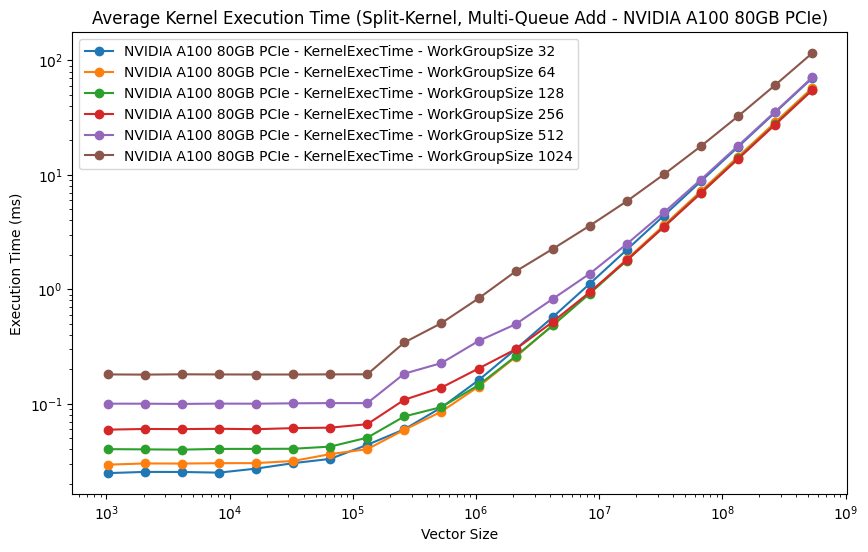

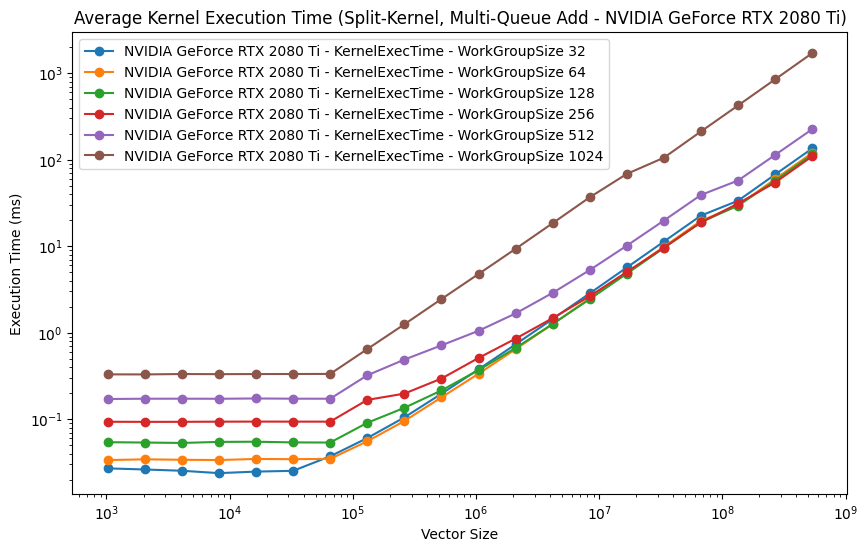

In [40]:
# sk_grouped = sk_add.groupby(["VectorSize","Event","WorkGroupSize", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# splitk_add = pd.read_csv("split-kernel-multiQ-add/timings.csv")
splitk_grouped = splitk_add.groupby(["VectorSize","Event","WorkGroupSize", "Device"])["ExecTime(ms)"].agg(["mean", "std"]).reset_index()
# print(splitk_grouped.columns)

# Pivot the DataFrame to have events as columns
pivot_df = splitk_grouped.pivot_table(index=['VectorSize', 'WorkGroupSize', 'Device'], columns='Event', values='mean').reset_index()

pivot_df['KernelExecTime'] = pivot_df['Add Kernel Exec Time'] + pivot_df['Enqueue Exec Time'] + pivot_df['Shutdown Kernel Exec Time']


# Drop the individual event columns
split_final = pivot_df.drop(columns=['Add Kernel Exec Time', 'Enqueue Exec Time', 'Shutdown Kernel Exec Time'])

for device in sk_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))

    ax.set_xscale("log")
    ax.set_yscale("log")

    for event in ["KernelExecTime"]:
        for wg_size in [32, 64, 128, 256, 512, 1024]:
            wg_data = split_final[(split_final["Device"] == device) & 
                                (split_final["WorkGroupSize"] == wg_size)
                                ]

            if not wg_data.empty:
                ax.errorbar(wg_data["VectorSize"],
                            wg_data["KernelExecTime"],
                            label=f"{device} - {event} - WorkGroupSize {wg_size}",
                            fmt="-o")
    device_data = sk_grouped[sk_grouped['Device'] == device]

    # Set labels and title
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Average Kernel Execution Time (Split-Kernel, Multi-Queue Add - {device})')    
    ax.legend()

    # Show plot
    plt.show()

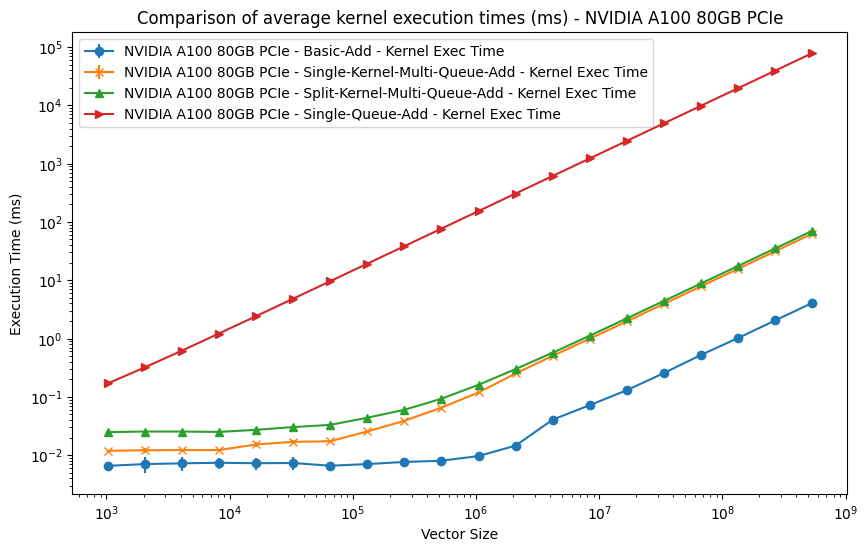

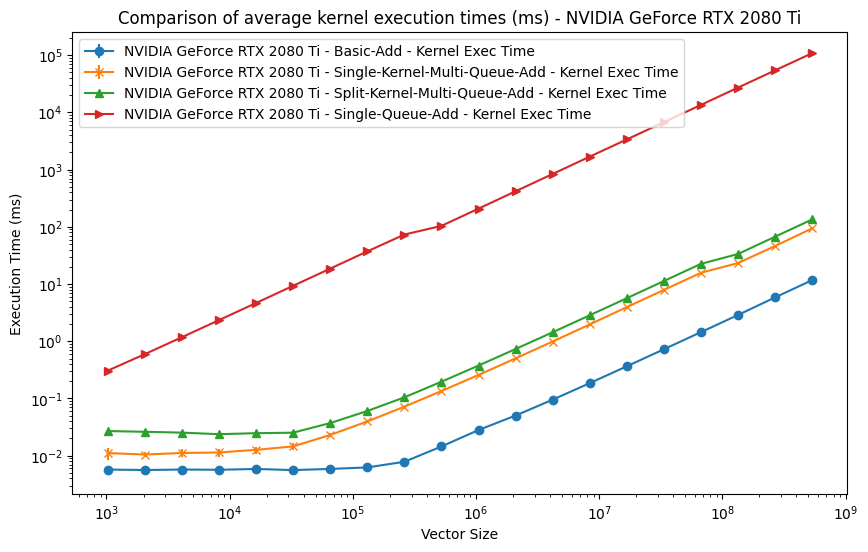

In [41]:
# ==========================
# COMPARISON -- KERNEL EXEC
# ==========================

pivot_df = oneq_grouped.pivot_table(index=['VectorSize', 'Device'], columns='Event', values='mean').reset_index()
pivot_df['KernelExecTime'] = pivot_df['Add Kernel Exec Time'] + pivot_df['Enqueue Kernel Exec Time'] + pivot_df['Shutdown Kernel Exec Time']
oneq_final = pivot_df.drop(columns=['Add Kernel Exec Time', 'Enqueue Kernel Exec Time', 'Shutdown Kernel Exec Time'])

for device in dp_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xscale("log")
    ax.set_yscale("log")

    dp_dev = dp_grouped[dp_grouped['Device'] == device]
    ax.errorbar(dp_dev[dp_dev['Event'] == 'Kernel Exec Time']['VectorSize'], 
                 dp_dev[dp_dev['Event'] == 'Kernel Exec Time']['mean'], 
                 yerr=dp_dev[dp_dev['Event'] == 'Kernel Exec Time']['std'], 
                 label=f"{device} - Basic-Add - Kernel Exec Time", fmt='-o')

    sk_dev = sk_grouped[(sk_grouped["Device"] == device) & (sk_grouped["WorkGroupSize"] == 32)]
    ax.errorbar(sk_dev[sk_dev['Event'] == 'Kernel Exec Time']['VectorSize'], 
                    sk_dev[sk_dev['Event'] == 'Kernel Exec Time']['mean'], 
                    yerr=sk_dev[sk_dev['Event'] == 'Kernel Exec Time']['std'], 
                    label=f"{device} - Single-Kernel-Multi-Queue-Add - Kernel Exec Time", fmt='-x')

    split_dev = split_final[(split_final["Device"] == device) & (split_final["WorkGroupSize"] == 32)]
    ax.errorbar(split_dev['VectorSize'], 
                    split_dev["KernelExecTime"], 
                    label=f"{device} - Split-Kernel-Multi-Queue-Add - Kernel Exec Time", fmt='-^')

    oneq_dev = oneq_final[oneq_final["Device"] == device]
    ax.errorbar(oneq_dev['VectorSize'], 
                oneq_dev["KernelExecTime"], 
                label=f"{device} - Single-Queue-Add - Kernel Exec Time", fmt='->')
    # Set labels and title
    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Comparison of average kernel execution times (ms) - {device}')
    ax.legend()

    # Show plot
    plt.show()

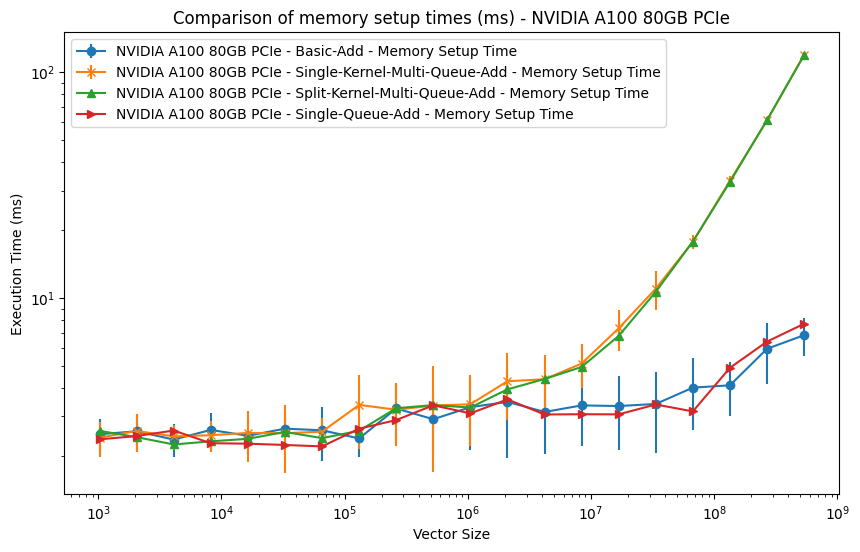

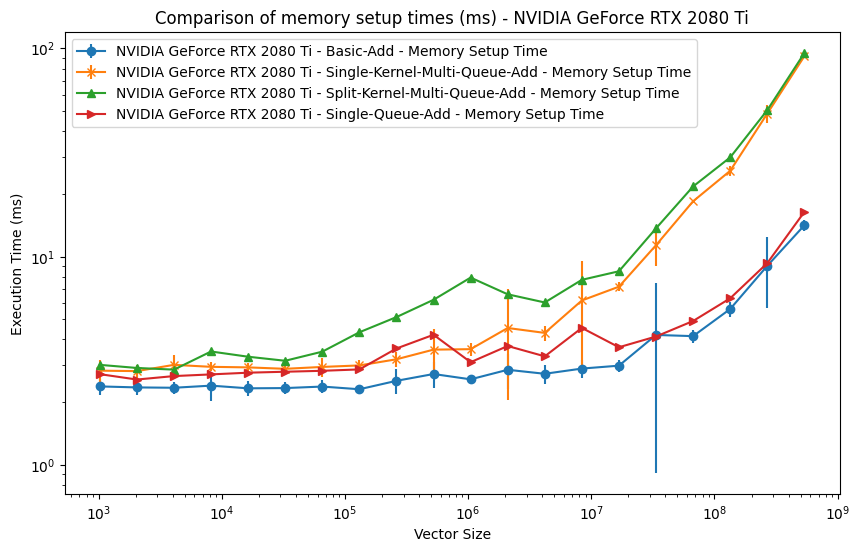

In [53]:
# ==========================
# COMPARISON -- MEMORY SETUP
# ==========================

for device in dp_grouped['Device'].unique():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xscale("log")
    ax.set_yscale("log")

    dp_dev = dp_grouped[dp_grouped['Device'] == device]
    ax.errorbar(dp_dev[dp_dev['Event'] == 'Memory Setup Time']['VectorSize'], 
                 dp_dev[dp_dev['Event'] == 'Memory Setup Time']['mean'], 
                 yerr=dp_dev[dp_dev['Event'] == 'Memory Setup Time']['std'], 
                 label=f"{device} - Basic-Add - Memory Setup Time", fmt='-o')

    sk_dev = sk_grouped[(sk_grouped["Device"] == device) & (sk_grouped["WorkGroupSize"] == 32)]
    ax.errorbar(sk_dev[sk_dev['Event'] == 'Memory Setup Time']['VectorSize'], 
                    sk_dev[sk_dev['Event'] == 'Memory Setup Time']['mean'], 
                    yerr=sk_dev[sk_dev['Event'] == 'Memory Setup Time']['std'], 
                    label=f"{device} - Single-Kernel-Multi-Queue-Add - Memory Setup Time", fmt='-x')

    split_dev = split_final[(split_final["Device"] == device) & (split_final["WorkGroupSize"] == 32)]
    ax.errorbar(split_dev['VectorSize'], 
                    split_dev["Memory Setup Time"], 
                    label=f"{device} - Split-Kernel-Multi-Queue-Add - Memory Setup Time", fmt='-^')

    oneq_dev = oneq_final[oneq_final["Device"] == device]
    ax.errorbar(oneq_dev['VectorSize'], 
                oneq_dev["Memory Setup Time"], 
                label=f"{device} - Single-Queue-Add - Memory Setup Time", fmt='->')

    ax.set_xlabel('Vector Size')
    ax.set_ylabel('Execution Time (ms)')
    ax.set_title(f'Comparison of memory setup times (ms) - {device}')
    ax.legend()

    # Show plot
    plt.show()